In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import tsfresh
import json
import datetime
from model import *

SyntaxError: invalid syntax (model.py, line 42)

In [4]:
data = pd.read_excel('project_3_train+test.xlsx', index_col='Date')

In [5]:
train = data.iloc[:357]
test = data.iloc[357:]

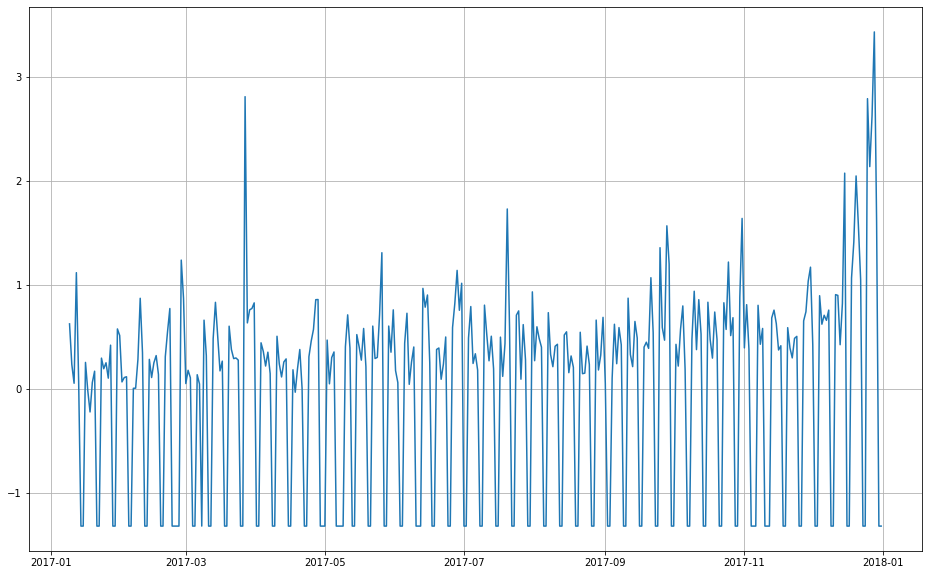

In [6]:
plt.figure(figsize=(16,10))
plt.plot(train)
plt.grid()
plt.show()

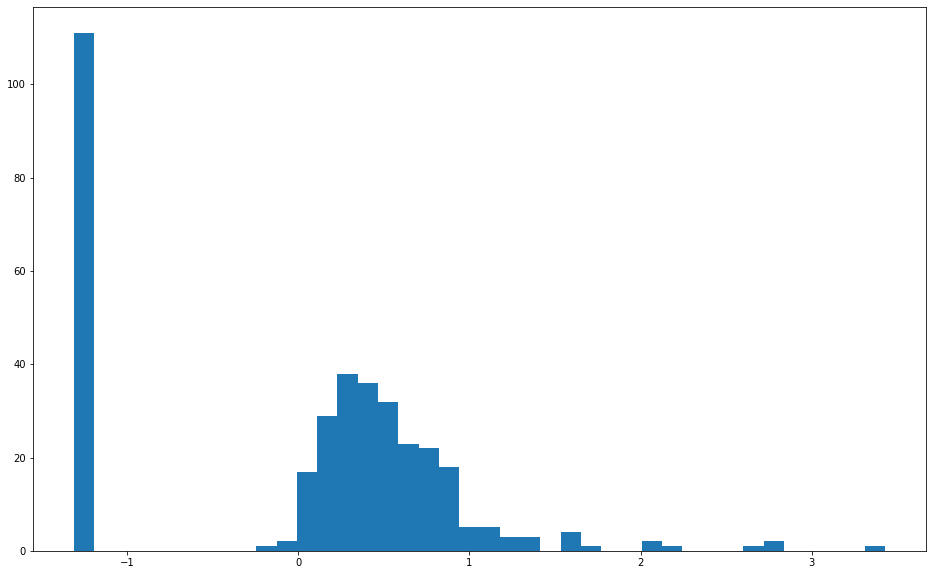

In [7]:
plt.figure(figsize=(16,10))
plt.hist(train.values, bins=40)
plt.show()

Столбец слева и сильнейшие колебания в отрицательные значения говорят о том, что что-то не так.

Если заглянуть в файл и календарь, то можно увидеть, что это одно и то же значение и оно стоит на выходном дне.

Поэтому удалим эти данные.

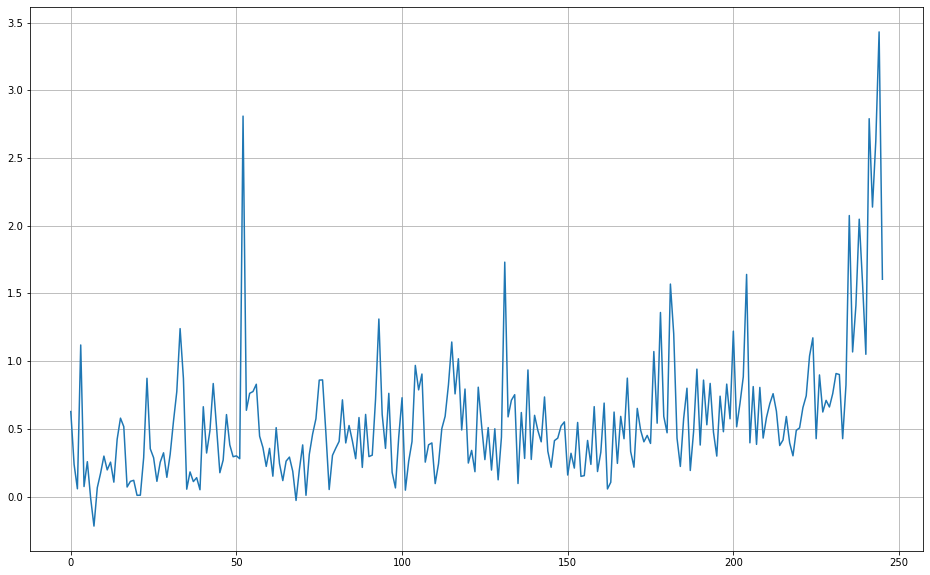

In [8]:
plt.figure(figsize=(16,10))
plt.plot(train['Target'].values[train['Target'] != train['Target'].values.min()])
plt.grid()
plt.show()

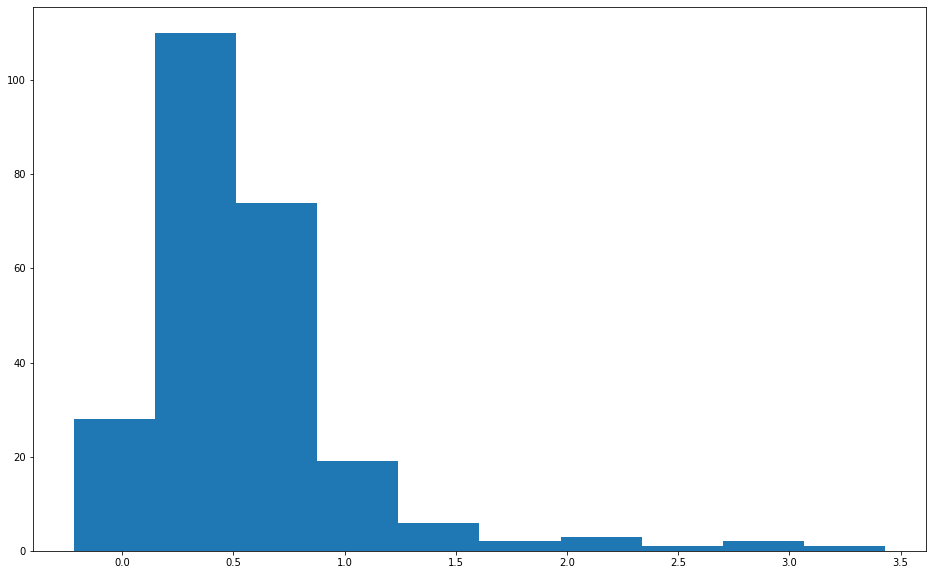

In [9]:
plt.figure(figsize=(16,10))
plt.hist(train['Target'].values[train['Target'] != train['Target'].values.min()])
plt.show()

Уже лучше. Переобозначим данные. Надо бы подумать, какое это распределение

In [10]:
data = data[data['Target'] != data['Target'].min()]
train = train[train['Target'] != train['Target'].min()]
test = test[test['Target'] != test['Target'].min()]

Посмотрим, как у нас со скользящим средним.

In [11]:
plotMovingAverage(train, train['Target'], 20)

NameError: name 'plotMovingAverage' is not defined

В конце намечается какой-то тренд. Посмотрим на все данные.

In [10]:
plotMovingAverage(data, data['Target'], 20)

NameError: name 'plotMovingAverage' is not defined

Видим, что ликвидность нарастает к концу года, а в начале года она спадает и возвращается к прежней форме.

In [12]:
sc.stats.kstest(train['Target'], 'norm')

KstestResult(statistic=0.49459162269519086, pvalue=4.378906008220171e-56)

In [14]:
poisson_test = [[sc.stats.kstest(train['Target'], sc.stats.poisson.cdf, args=(j,i)) for i in range(1,10)] for j in range(1, len(train))]
poisson_test

[[KstestResult(statistic=0.8943089430894309, pvalue=1.8794203279113987e-240),
  KstestResult(statistic=0.9715447154471545, pvalue=0.0),
  KstestResult(statistic=0.9959349593495935, pvalue=0.0),
  KstestResult(statistic=1.0, pvalue=0.0),
  KstestResult(statistic=1.0, pvalue=0.0),
  KstestResult(statistic=1.0, pvalue=0.0),
  KstestResult(statistic=1.0, pvalue=0.0),
  KstestResult(statistic=1.0, pvalue=0.0),
  KstestResult(statistic=1.0, pvalue=0.0)],
 [KstestResult(statistic=0.8943089430894309, pvalue=1.8794203279113987e-240),
  KstestResult(statistic=0.9715447154471545, pvalue=0.0),
  KstestResult(statistic=0.9959349593495935, pvalue=0.0),
  KstestResult(statistic=1.0, pvalue=0.0),
  KstestResult(statistic=1.0, pvalue=0.0),
  KstestResult(statistic=1.0, pvalue=0.0),
  KstestResult(statistic=1.0, pvalue=0.0),
  KstestResult(statistic=1.0, pvalue=0.0),
  KstestResult(statistic=1.0, pvalue=0.0)],
 [KstestResult(statistic=0.9217576470792905, pvalue=1.2313541451293548e-272),
  KstestResult(s

In [16]:
fisher_test = [[sc.stats.kstest(train['Target'], sc.stats.f.cdf, args=(i,j)) for i in range(1,100)] for j in range(1,100)]
fisher_test

[[KstestResult(statistic=0.4048159675595647, pvalue=6.244377044509251e-37),
  KstestResult(statistic=0.4792448998256734, pvalue=1.8007326229563734e-52),
  KstestResult(statistic=0.5117576850624087, pvalue=2.6423912051538933e-60),
  KstestResult(statistic=0.5293378371240673, pvalue=7.956117053233266e-65),
  KstestResult(statistic=0.5403249232944713, pvalue=9.306557660283232e-68),
  KstestResult(statistic=0.5478342100972309, pvalue=8.253447784825614e-70),
  KstestResult(statistic=0.5532884672143281, pvalue=2.5178855921881903e-71),
  KstestResult(statistic=0.5574285557397759, pvalue=1.7232347606445062e-72),
  KstestResult(statistic=0.5606778213809104, pvalue=2.0584724545586164e-73),
  KstestResult(statistic=0.5632955783855431, pvalue=3.668382575781846e-74),
  KstestResult(statistic=0.5654494769388377, pvalue=8.7973141101642855e-75),
  KstestResult(statistic=0.5672807628480653, pvalue=2.596593866179701e-75),
  KstestResult(statistic=0.5688378492225172, pvalue=9.158887775976833e-76),
  Kste

Тут я что-то про итоги теста скажу. А вообще __НИД ХЕЛП__

TypeError: _parse_args() missing 1 required positional argument: 'mu'

# Feature engineering

In [12]:
train

,Target
Date,
2017-01-09,0.627938
2017-01-10,0.238050
2017-01-11,0.057763
2017-01-12,1.119530
2017-01-13,0.074451
...,...
2017-12-25,2.790113
2017-12-26,2.137712
2017-12-27,2.625104


In [13]:
train['quarter'] = train.index.quarter
test['quarter'] = test.index.quarter

train['month'] = train.index.month
test['month'] = test.index.month

train['week'] = train.index.week
test['week'] = test.index.week

train['weekday'] = train.index.weekday
test['weekday'] = test.index.weekday

# Бизнес-логика

# Anomaly detection

# Feature selection